<a href="https://colab.research.google.com/github/PatchFramework/data-exploration-project/blob/main/data_exploration_anime_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration Project - Anime Recommendation
#### Team: PostgreSQL (Can Berkil, Canberk Alkan, Dominic Viola)
This Jupyter Notebook is designed to run on Google Colab, as it provides a standardized Linux environment and preinstalled applications. It contains the code that is used to download and analyse an Anime dataset. Afterwards the dataset is used to build a recommendation engine.



## Development Notes:

ToDo:

1. Headings and their content for: 
- Data selection (why did we choose this dataset? <- use information from Canberks PowerPoint) <- Canberk
- Data cleaning 
- Data transformation 
- Data exploration
- Model selection (papers to determine suitable algorithms)

## 1. Download the dataset
The dataset is from Kaggle you can find general information about it [here](https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv).

I downloaded the dataset to my private google drive and created a public link to ensure that the dataset is available. This is in compliance with the dataset's Creative Commons License.

In [ ]:
# Download the dataset from my google drive
!gdown --id 1XPYCQvsGq4cKp1liPmxPDd7QkU04Kj4X -O ./anime_dataset.zip
!ls

Downloading...
From: https://drive.google.com/uc?id=1XPYCQvsGq4cKp1liPmxPDd7QkU04Kj4X
To: /content/anime_dataset.zip
26.3MB [00:00, 56.5MB/s]
anime_dataset.zip  sample_data


In [ ]:
# create a directory for the data
!mkdir data

# after downloading the dataset as a zip unzip the dataset into the new folder
# only execute if unzipped anime.csv doesn't already exist (cell can be re-run easier)
! [ ! -f data/anime.csv ] && unzip anime_dataset.zip -d ./data/

!ls data

Archive:  anime_dataset.zip
  inflating: ./data/anime.csv        
  inflating: ./data/rating.csv       
anime.csv  rating.csv


## 2. Data Selection

This section will shed a light on why [this](https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv) dataset was choosen and what the characteristics of the dataset are.

## 3. Fundamental dataset exploration

Now the content and structure of this dataset will explored.


Lets see how the csv files that were downloaded are structured.
Lets look at the first few lines of each file with the linux command "head".

The goal is to find information about:
- column names
- datatypes  
- the seperator (we need it for pandas later)
- how the CSV files are connected


In [ ]:
!head -5 data/anime.csv

anime_id,name,genre,type,episodes,rating,members
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572


In [ ]:
!head -5 data/rating.csv

user_id,anime_id,rating
1,20,-1
1,24,-1
1,79,-1
1,226,-1


What can be learned from this first peak into the dataset:
1. Columns in anime.csv
- "anime_id" is the identifier for each anime
- "name" contains the name as a string but without quotes
- "genre" contains all genres that the anime is part of, quotes are used, so that the comma seperated genres are not confused with csv fields
- "type" shows which medium type the anime is 
- "rating" seems to be a general rating from 1 to 10
- "members" ?

2. Columns in rating.csv
- "user" is the id of the user, that gave the rating
- "anime_id" is the identifier of the anime, this is the connecting field to anime.csv
- "rating" is the rating that the user gave the anime. There is -1 as an entry which can't be an actual rating, so -1 could mean, that the user didn't rate the anime

3. The seperator is a comma for both csv-files


## 4. Data Cleaning
Unnecessary fields will be dropped from the dataset, the dataset will be checked for inconsistencies and redundancies. Also fields with incorrect datatypes will be fixed.

We will use the following libraries to process the data:
1. Pandas: To save the dataset to dataframes for easier handling and manipulation in python
2. Seaborn: Visualize some of the data to get an overview over the content

In [ ]:
# Install the library packages (might be already installed)
!pip3 install pandas seaborn

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
anime_df = pd.read_csv("data/anime.csv")
rating_df = pd.read_csv("data/rating.csv")

In [ ]:
# Total amount of Anime in this dataset
len(anime_df["anime_id"])

12294

In [ ]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
# Existing columns in anime_df and rating_df
anime_df.columns
rating_df.columns

"""
Keep in mind that both anime_df and rating_df do have the attribute "anime_id".
This will be important to merge both DataFrames.
"""

'\nKeep in mind that both anime_df and rating_df do have the attribute "anime_id".\nThis will be important to merge both DataFrames.\n'

In [ ]:
# Since members is not needed for the data analysis, it can be dropped
#anime_df.drop(columns=["members"], inplace=True)

anime_df["genre"] = anime_df["genre"].replace(np.nan, "undefinied")
anime_df["rating"] = anime_df["rating"].replace(np.nan, "undefinied")
anime_df["type"] = anime_df["type"].replace(np.nan, "undefinied")
# Replace all instances of nan or none or null in the dataset to prevent errors 
#anime_df.replace([None, nan, null], value="undefinied")
anime_df[anime_df.genre == "undefinied"]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,undefinied,Special,1,7.15,6604
3541,33589,ViVid Strike!,undefinied,TV,12,6.96,12345
6040,29765,Metropolis (2009),undefinied,Movie,1,6.27,313
6646,32695,Match Shoujo,undefinied,ONA,1,6.02,242
7018,33187,Katsudou Shashin,undefinied,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,undefinied,undefinied,Unknown,undefinied,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,undefinied,Movie,1,undefinied,51
11097,34474,Tsukipro The Animation,undefinied,TV,Unknown,undefinied,843
11112,33035,Yuyushiki Special,undefinied,Special,1,undefinied,2294


In [ ]:
# Total amount of Users who rated Anime
rating_df["user_id"].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516])

In [ ]:
# Total amount of Anime Genre in this dataset
len(anime_df["genre"].unique())

3265

In [ ]:
# change datatype of genre from string to list
for index, genre in enumerate(anime_df["genre"]):
  # create string without whitespaces, by splitting at every space and rejoin to a string
  genres_stripped = "".join(anime_df["genre"][index].split(" "))

  # split the string at every comma -> new datatype: list
  anime_df["genre"][index] = genres_stripped.split(",")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(anime_df["genre"][1000:1010])

1000                                  [Drama, Historical]
1001                        [Comedy, School, SliceofLife]
1002             [Comedy, Ecchi, Romance, School, Seinen]
1003      [Action, Drama, Fantasy, Romance, Supernatural]
1004    [Action, Adventure, Drama, Military, Sci-Fi, S...
1005             [Drama, Historical, School, SliceofLife]
1006    [Action, Adventure, Comedy, Ecchi, Fantasy, Ha...
1007                    [Action, Comedy, School, Shounen]
1008            [Action, Adventure, Mecha, Music, Sci-Fi]
1009        [Adventure, Comedy, Fantasy, Sci-Fi, Shounen]
Name: genre, dtype: object


## 5. Data transformation

In this step datafields are converted to fine granular elements. Also dataframes are combined, so that the data is prepared for processing in the model.

In [ ]:
# Now we will merge the two DataFrames, so we only have to handle one 
anime_with_ratings = pd.merge(rating_df, anime_df, on="anime_id")

In [ ]:
anime_with_ratings

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"[Action, Comedy, MartialArts, Shounen, SuperPo...",TV,220,7.81,683297
1,3,20,8,Naruto,"[Action, Comedy, MartialArts, Shounen, SuperPo...",TV,220,7.81,683297
2,5,20,6,Naruto,"[Action, Comedy, MartialArts, Shounen, SuperPo...",TV,220,7.81,683297
3,6,20,-1,Naruto,"[Action, Comedy, MartialArts, Shounen, SuperPo...",TV,220,7.81,683297
4,10,20,-1,Naruto,"[Action, Comedy, MartialArts, Shounen, SuperPo...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"[Comedy, Sci-Fi, Shounen]",Special,1,6.17,248
7813723,69497,33484,10,Shiroi Zou,"[Action, Historical, Kids]",Movie,1,4.71,45
7813724,70463,29481,-1,Kakinoki Mokkii,"[Fantasy, Kids]",Special,1,4.33,61
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,[Music],Music,1,6.76,239


## 6. Advanced Data Exploration 
The transformed data will be analysed to see which similarities and patterns might occur. Also assumptions about the necessary model and the challenges that may arise while training it can be made. Furthermore, the advanced exploration of the data can be used to assess the performance of the model in later steps.

In [ ]:
# packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
#Count all Genres in our Data-Set

# This dict is used to count how often which genre is in the dataset
genres_dict = {}

# iterate through list of animes, each anime has a list of genres
for genres in anime_df["genre"]:
  # iterate through the genres of each anime
  for genre in genres:
    # if the genre was already observed, increase the count by one
    if genre in genres_dict.keys():
      genres_dict[genre] += 1
    # if the genre hasn't been observed yet, initilize with 1
    else:
      genres_dict[genre] = 1
  
print(genres_dict)

{'Drama': 2016, 'Romance': 1464, 'School': 1220, 'Supernatural': 1037, 'Action': 2845, 'Adventure': 2348, 'Fantasy': 2309, 'Magic': 778, 'Military': 426, 'Shounen': 1712, 'Comedy': 4645, 'Historical': 806, 'Parody': 408, 'Samurai': 148, 'Sci-Fi': 2070, 'Thriller': 87, 'Sports': 543, 'SuperPower': 465, 'Space': 381, 'SliceofLife': 1220, 'Mecha': 944, 'Music': 860, 'Mystery': 495, 'Seinen': 547, 'MartialArts': 265, 'Vampire': 102, 'Shoujo': 603, 'Horror': 369, 'Police': 197, 'Psychological': 229, 'Demons': 294, 'Ecchi': 637, 'Josei': 54, 'ShounenAi': 65, 'Game': 181, 'Dementia': 240, 'Harem': 317, 'Cars': 72, 'Kids': 1609, 'ShoujoAi': 55, 'undefinied': 62, 'Hentai': 1141, 'Yaoi': 39, 'Yuri': 42}


In [ ]:
#Show Top 10 Genres in our Data-Set
from collections import Counter
# sort the genres by how often they were counted in genres_dict
# dict.items() returns a tuple for each key/value pair, so x[0] is the key and x[1] is the value 
top10_genres= sorted(genres_dict.items(), key=lambda x: x[1], reverse=True)[:10]
top10_genres

# Read title and count from each tuple
top10_genres_title = [ x[0] for x in top10_genres ]
top10_genres_count = [ x[1] for x in top10_genres ]

<BarContainer object of 10 artists>

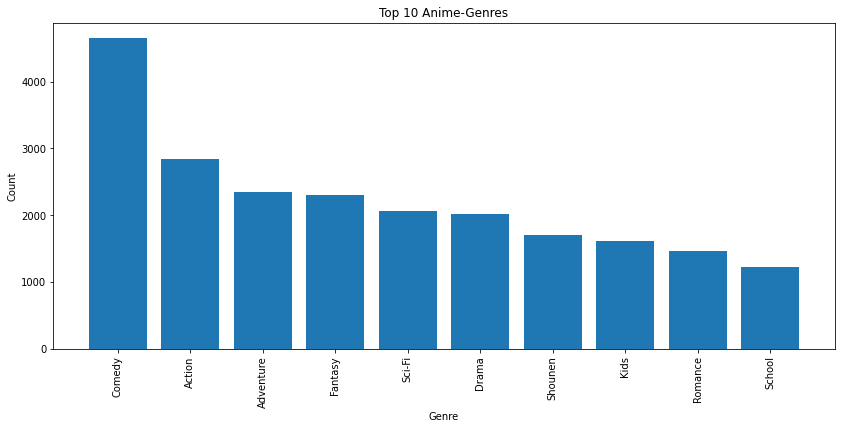

In [ ]:
#Plot results in a bar chart
fig = plt.figure(figsize = (14, 6))
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Anime-Genres")
plt.xticks(rotation=90)
plt.bar(height=top10_genres_count , x=top10_genres_title )

In [ ]:
from collections import Counter

#Count how often a specific type appears in our data set
type_count = anime_with_ratings["type"].value_counts()
type_count
type_name= Counter(anime_with_ratings["type"])
type_name= list(sorted(type_name, key=type_name.get, reverse=True))
type_name

['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'undefinied']

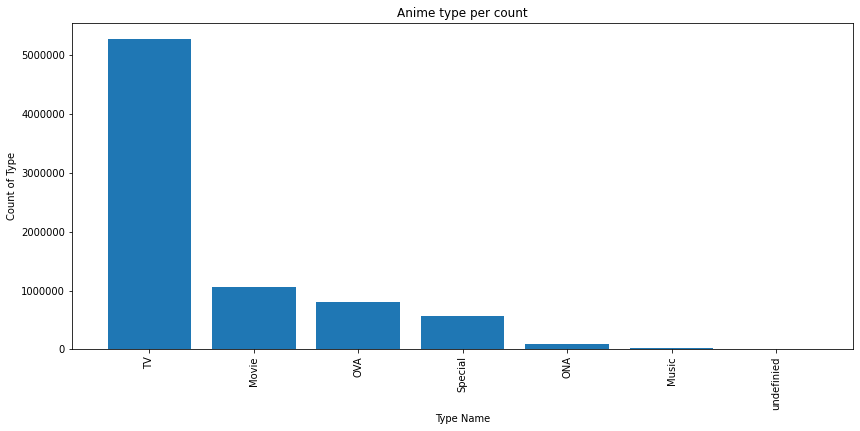

In [ ]:
fig = plt.figure(figsize = (14, 6))
plt.xlabel("Type Name")
plt.ylabel("Count of Type")
plt.title("Anime type per count")
plt.xticks(rotation=90)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(height=type_count,x=type_name)
plt.show()

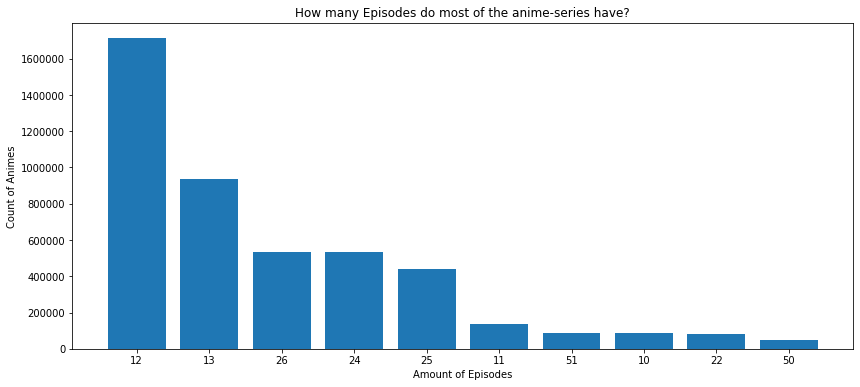

In [ ]:
#Count Episodes in Type TV / How many Series got a specific amount of episodes?
fig = plt.figure(figsize = (14, 6))
tv = anime_with_ratings[anime_with_ratings.type == "TV"]
episodes_count = tv["episodes"].value_counts()
e_t10 = episodes_count[:10]
plt.xlabel("Amount of Episodes")
plt.ylabel("Count of Animes")
plt.title("How many Episodes do most of the anime-series have?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(height=e_t10, x=list(e_t10.index))
plt.show()

In [ ]:
anime_with_ratings.columns

Index(['user_id', 'anime_id', 'rating_x', 'name', 'genre', 'type', 'episodes',
       'rating_y', 'members'],
      dtype='object')

In [ ]:
   anime_with_ratings_grouped = anime_with_ratings[["user_id", "rating_y", "name"]].groupby(["rating_y", "name"]).count()
   anime_with_ratings_grouped

,,user_id
rating_y,anime_id,
1.67,34476,1
1.92,20007,2
2.0,3287,237
2.14,13405,91
2.37,413,1131
...,...,...
9.37,32281,2199
9.5,23005,1
undefinied,9488,1


AttributeError: ignored

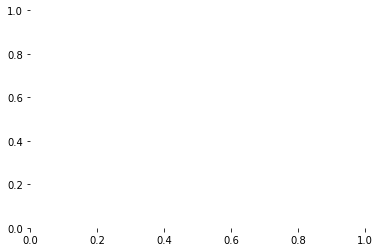

In [ ]:
sns.heatmap(anime_with_ratings_grouped, index ="name", columns="rating_y", values ="name", title = "test", xlabel = "test", ylabel= "test")

## 6. Model selection
Model selection will contain a discussion about considerations that were made to select a fitting model for this dataset and context. It will also provide the scientific foundation for the selected model and any further considerations that went into the model selection and appropriate metrics that are derived from the model or fed into the model. 

Recommendation systems methods are divided into two categories, that we want to address, before stating which method we chose.

#### **1. Collaborative Filtering**
This approach is based on user-item interactions like ratings, likes and dislikes for a certain item. The basic idea is that users with a similar taste (in this example similar ratings for items) can be identified. Based on those neighbouring / similar users and their content interactions, recommendations can be made. ([Burke et al., 2011](https://ojs.aaai.org/index.php/aimagazine/article/view/2361))

Such user-item interactions are stored in the so called "user-item matrix", where the columns represent the users and the row represent the items or vice versa. The entries in each cell represent the interaction between the item and the user in numeric values, like a rating from 1 to 10. The user-item matrix is sparse, because there are many user-item interactions that didn't occur, yet. The class of collaborative filtering definies how the user-item matrix is populated. These collaborative filtering classes are: memory based and model based.([Xu et al., 2012](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.461.2978&rep=rep1&type=pdf))

##### **memory based**
Memory based collaborative filtering uses similarity metrics to find users with similar preferences from the sparse user-item matrix. According to [Stephen et al., 2017](https://researchrepository.murdoch.edu.au/id/eprint/38661/1/a32-Stephen.pdf) the memory based approach can be represented by 3 steps:
1. Calculate a similarity measure between two users or two items
2. Predict the user-item interaction based on a weighted average over all ratings of the user or item
3. Generate a top X ranking based on that user or item


##### **model based**
The model based approach uses machine learning to build a model that can describe the user preferences that are already present in the user-item matrix. That model is then used to fill in the gaps in the user-item matrix and therefore predict how different users would interact with a certain item.
That information is then used to give recommendations to the user. ([Yu et al., 2004](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.329.8903&rep=rep1&type=pdf))



</br>
</br>

#### **2. Content-based filtering**
This approach analyses the user preferences and tries to find similarities in the prefered items of that specific user ([Reddy et al., 2019](https://www.academia.edu/download/62049148/contentbased20200209-27698-l8hk2i.pdf)). It does so by using attributes of the prefered items such as genre, brand, publisher, type and so on. Therefore, the user profile is based on inherent information of the items prefered by them, in contrast to collaborative filtering, where the user profile is based on other users preferences.

According to [Reddy et al., 2019](https://www.academia.edu/download/62049148/contentbased20200209-27698-l8hk2i.pdf) there are three methods of content based filtering:

1. **Wrapper methods** that split features of the items into subsets and evaluates which subset is most relevant
2. **Filter Methods** that rank the relevance of features with a heuristic
3. **Embedded Methods** use a Machine Learning algorithm that selects relevant features during the training phase


### **Selecting the model**

After what has been learned about different approaches to recommender systems, which method is the best fit for the dataset and the context of anime recommendation.

First of all both content-based filtering and collaborative filtering would be possible, as the dataset has some features for each anime and also thousands of preferences for different users.

Based on the [this](https://arxiv.org/pdf/1905.01395.pdf) study by Rendle et al. in 2019 Matrix factorization is not only a baseline model for recomender systems, but can even outperform newly proposed models if used properly. Rendle et al. research also indicates that matrix factorization is a good fit for datasets such as the Netflix Prize as seen in [this](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.115.6998&rep=rep1&type=pdf) paper or the movielense dataset. Both of these datasets have similar features as the anime dataset, that is used in this Jupyter Notebook.


## 7. Model training 
The dataset will be split into train and test samples and the model will be trained to give anime recommendations based on any users data.